## Mushroom classification
### Table of contents:
[Problem statement](#ps)

[Data Description](#dd)

[Descriptive stats, Data Analysis & Graphs](#ds)

[Algorithm Selection](#as)

[Evaluation Metrics](#em)

[Observations and Conclusions](#oc)

### Problem statement <a name='ps'></a>

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom;

#### Objective:
Required to predict whether mushroom is poisonous or edible.

#### Source: https://archive.ics.uci.edu/ml/datasets


### Data Description <a name='dd'></a>

Separating edible from poisonous species requires meticulous attention to detail; there is no single trait by which all toxic mushrooms can be identified, nor one by which all edible mushrooms can be identified. 

Number of Instances: 8124
Number of Attributes: 22 
Missing Attribute Values: 2480 of them (denoted by "?"), all from attribute #11.
Class Distribution: 
  Edible: 4208 (51.8%)
  Poisonous: 3916 (48.2%)
  
##### Attribute description:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d  

### Descriptive stats, Data Analysis & Graphs <a name='ds'></a>

#### Loading the data

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [8]:
print(os.getcwd());#setting work directory

E:\Tech UpX\Mushroom - logisitic


In [9]:
mushrooms=pd.read_csv("mushrooms.csv") #loading the data

##### Descriptive stats

In [10]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Observations:**<br/>
All the variables are categorical.
All columns have no missing values except Stalk-root.

In [11]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

**Observations:**<br/>
No of columns: 23<br/>
No of rows: 8124<br/>

##### Separating target variable

In [12]:
Y = mushrooms['class']
X = mushrooms.drop('class',axis=1)

#### Missing value imputation 

In [13]:
X.replace("?", np.nan,inplace = True)

**Note:**<br/>
There are missing values in column Stalk-root which are denoted as "?". Replaced those values with NAN.

In [14]:
X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

There are 2480 missing values in the Column "Stalk-root"

In [15]:
X = X.ffill().bfill()

**Note:** If you replace missing values with mean, result will be in float.. As the datatype is categorical replaced NAN with mode(using ffill and bfill function). 

#### Label Encoding 
The process of breaking the information down into a form we understand. In simple form, converting string categorical variables to numeric categorical variables.

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.columns:
     X[col]=le.fit_transform(X[col])

In [18]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


#### Correlation of Features:

In [22]:
X.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216


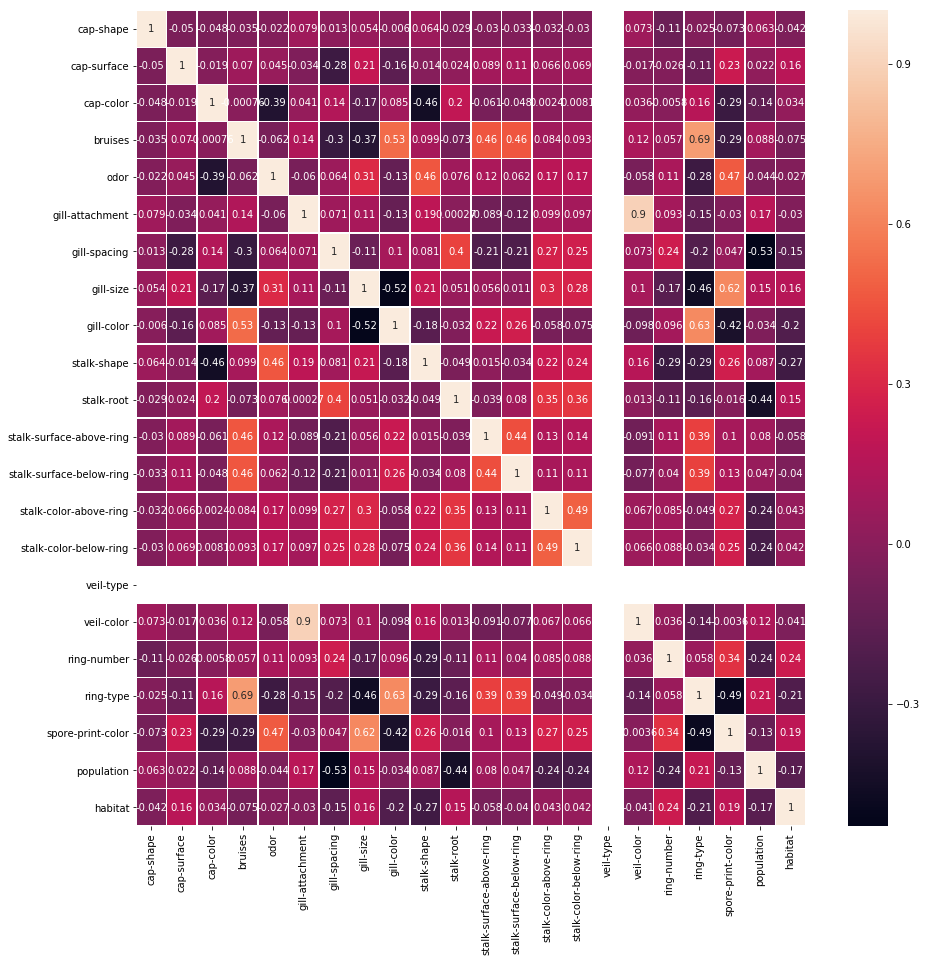

In [23]:
# Using Advanced Plotting Tool to plot correlation 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, linewidths=.5,)
plt.show()

##### Observations:
Veil Type Feature is only one type which has no significance as we can see in Above Heatmp. Other Features Ratio is as shown above

In [24]:
del X['veil-type']

**Note:**
Dropping "Veil-type" column based on correlation results

### Algorithm selection <a name='as'></a>

#### Data partition

In [27]:
# Spltting Data in Training and Testing Data
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 125)


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Model Building

**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

LR = LogisticRegression(random_state = 0)
# Using all features
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
#Let's see how our model performed
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          e       0.96      0.95      0.95      1065
          p       0.95      0.95      0.95       966

avg / total       0.95      0.95      0.95      2031



In [33]:
#Confusion matrix for the LR classification
print(confusion_matrix(Y_test, y_pred))

[[1012   53]
 [  44  922]]


**Random Forest Classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
#Random forest model is fit
classifier = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred_rf = classifier.predict(X_test)
#Let's see how our model performed
print(classification_report(Y_test, y_pred_rf))

             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1065
          p       1.00      1.00      1.00       966

avg / total       1.00      1.00      1.00      2031



**Decision Tree**

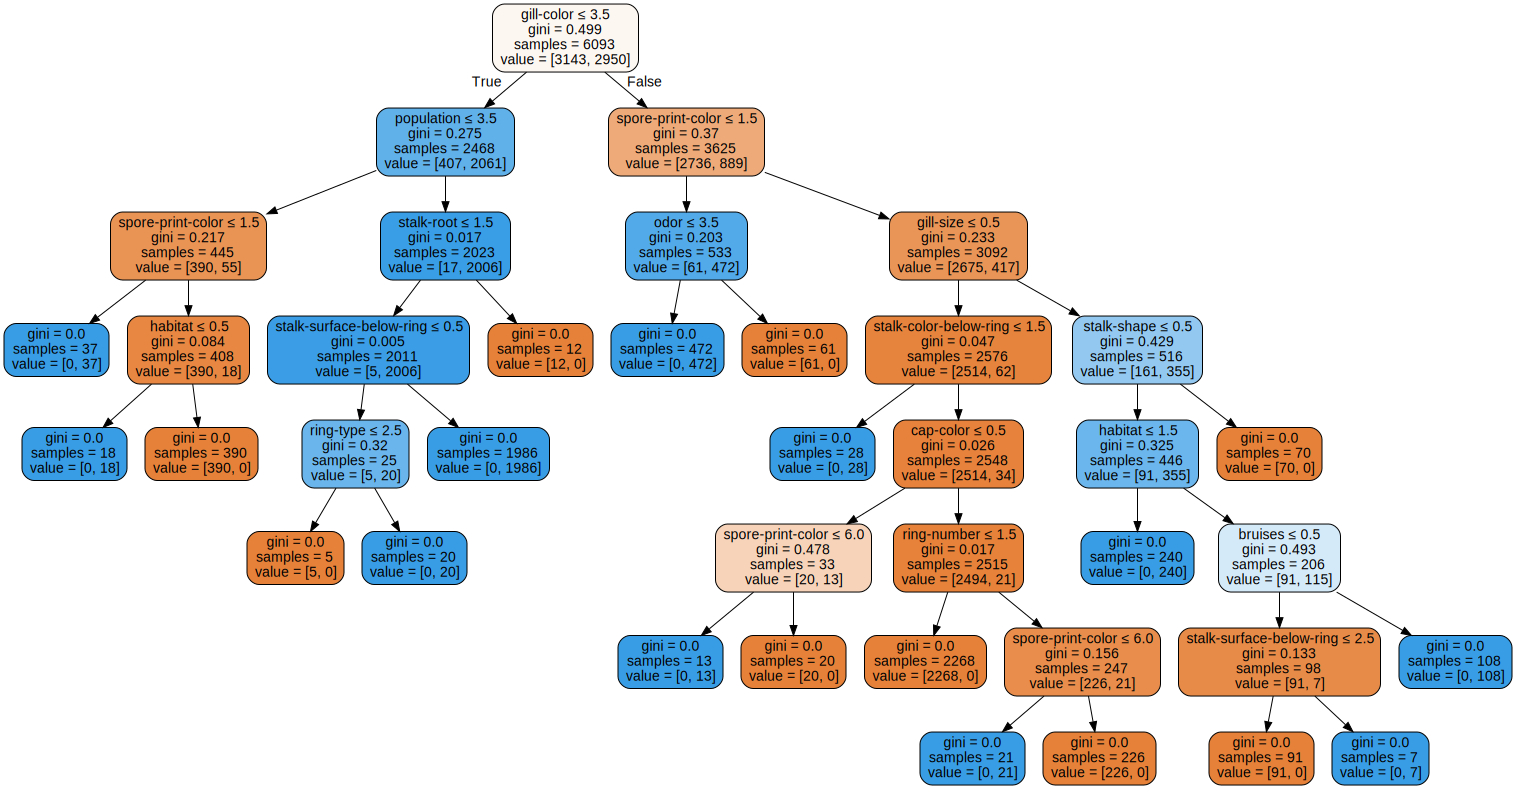

In [38]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [39]:
y_pred_dt = dt.predict(X_test)
#Let's see how our model performed
print(classification_report(Y_test, y_pred_dt))

             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1065
          p       1.00      1.00      1.00       966

avg / total       1.00      1.00      1.00      2031



### Evaluation metrics <a name='em'></a>

##### Cross validation - how well the model performs on the dataset

In [40]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
acc = []
names = []
result = []

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
    
    acc.append(acc_of_model)

    names.append(name)
    
    Out = "%s: %f (%f)" % (name, acc_of_model.mean(), acc_of_model.std())
    result.append(acc_of_model)
    print(Out)

LogisticRegression: 0.954044 (0.005886)
DecisionTreeClassifier: 1.000000 (0.000000)
RandomForestClassifier: 1.000000 (0.000000)


### Observations and Conclusions <a name='oc'></a>

**Observations:**<br/>
Logistic Regression: 95% <br/>
Decision Tree      :100% <br/>
Random Forest      :100% <br/>

**Conclusion:** All the three classifiers gives high accuracy. My understanding is , the data is a case of Imbalanced Classification. Hence, there should be oversampling, undersampling of the data. It is best to use SMOTE method and then create model on that.